<a href="https://colab.research.google.com/github/M-Sparsh-Mehra/LST-time-series-data-forcasting-using-MLR--Reproduced-Paper-/blob/main/multiple_linear_reg_LST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
import seaborn as sns

#Dataset

In [ ]:
dataset=pd.read_csv("/content/datalst.csv")

In [ ]:
dataset.head()

,Date,10:30a.m.(Terra Day-MOD11A2),01:30p.m.(Aqua Day-MYD11A2),10:30p.m.(Terra Night-MOD11A2),01:30a.m.(Aqua Night-MOD11A2)
0,04/07/2002,308.33,312.10,298.58,295.10
1,12/07/2002,313.00,316.87,298.91,297.93
2,20/07/2002,307.63,308.92,295.40,293.31
3,28/07/2002,309.62,316.32,295.70,295.73
4,05/08/2002,307.71,316.44,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            907 non-null    object 
 1   10:30a.m.(Terra Day-MOD11A2)    881 non-null    float64
 2   01:30p.m.(Aqua Day-MYD11A2)     888 non-null    float64
 3   10:30p.m.(Terra Night-MOD11A2)  866 non-null    float64
 4   01:30a.m.(Aqua Night-MOD11A2)   872 non-null    float64
dtypes: float64(4), object(1)
memory usage: 35.6+ KB


dataset contains missing values

In [ ]:
dataset.isnull().sum()

Date                               0
10:30a.m.(Terra Day-MOD11A2)      26
01:30p.m.(Aqua Day-MYD11A2)       19
10:30p.m.(Terra Night-MOD11A2)    41
01:30a.m.(Aqua Night-MOD11A2)     35
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

no duplicate data in dataset

# Data analysis

In [ ]:
dataset.describe()

,10:30a.m.(Terra Day-MOD11A2),01:30p.m.(Aqua Day-MYD11A2),10:30p.m.(Terra Night-MOD11A2),01:30a.m.(Aqua Night-MOD11A2)
count,881.000000,888.000000,866.000000,872.000000
mean,306.419557,309.637748,292.462298,291.068085
std,6.546348,6.638742,5.843786,5.882580
min,288.640000,294.390000,279.000000,278.690000
25%,301.500000,304.270000,287.367500,285.847500
50%,306.420000,309.130000,293.980000,292.540000
75%,311.290000,314.907500,297.160000,295.742500
max,320.900000,324.100000,303.590000,302.190000


##Histograms

terra day hist

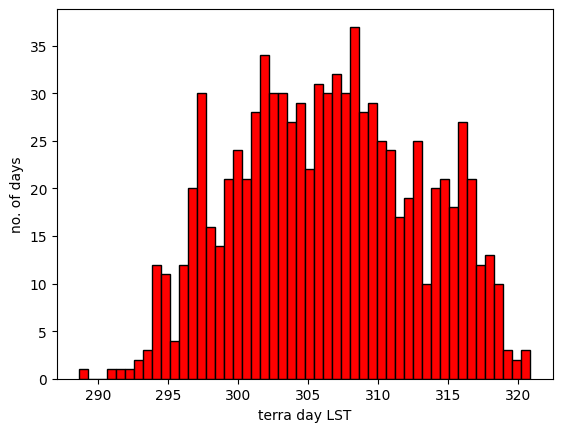

In [ ]:
feature="10:30a.m.(Terra Day-MOD11A2)"
mp.hist(dataset[feature], bins=50, color='red', edgecolor='black')
mp.xlabel("terra day LST")
mp.ylabel("no. of days")
mp.show()

aqua day hist

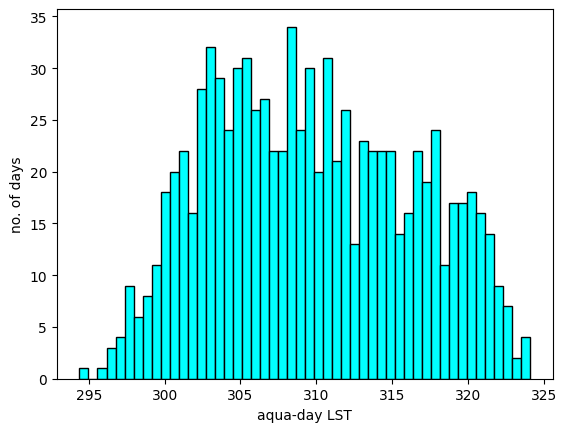

In [ ]:
feature="01:30p.m.(Aqua Day-MYD11A2)"
mp.hist(dataset[feature],bins=50,color="cyan",edgecolor="black")
mp.xlabel("aqua-day LST")
mp.ylabel("no. of days")
mp.show()

terra night

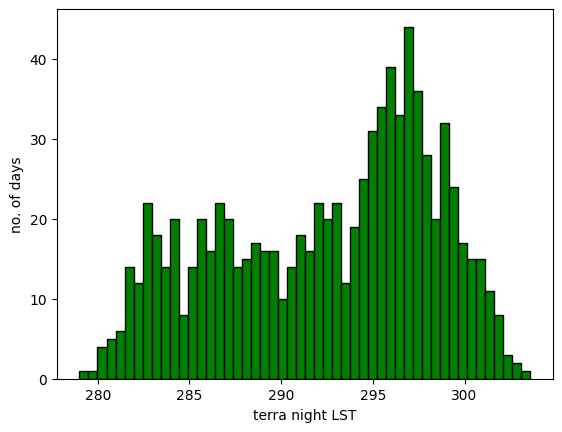

In [ ]:
feature="10:30p.m.(Terra Night-MOD11A2)"
mp.hist(dataset[feature],bins=50,edgecolor="black",color="green")
mp.xlabel("terra night LST")
mp.ylabel("no. of days")
mp.show()

aqua night

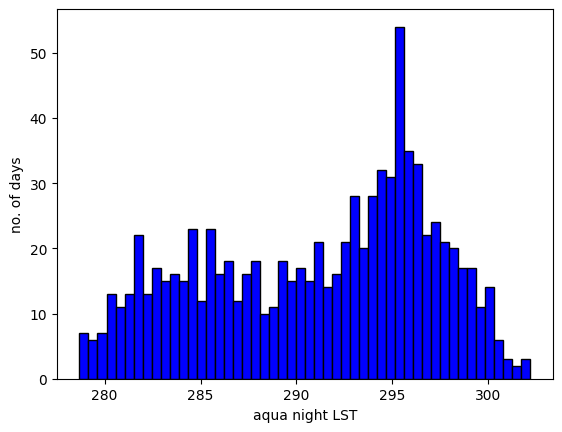

In [ ]:
feature="01:30a.m.(Aqua Night-MOD11A2)"
mp.hist(dataset[feature],bins=50,color="blue",edgecolor="black")
mp.xlabel("aqua night LST")
mp.ylabel("no. of days")
mp.show()

We try to predict ***aqua-night*** data using tera day , aqua day and terra night data.  

Since our target parameter contains missing data points we can eleminate the rows corresponding to missing data in aqua-night..and fill the missing data in rest of the columns.

## Handling missing values

In [ ]:
dataset.dropna(subset=['01:30a.m.(Aqua Night-MOD11A2)'], inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 906
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            872 non-null    object 
 1   10:30a.m.(Terra Day-MOD11A2)    860 non-null    float64
 2   01:30p.m.(Aqua Day-MYD11A2)     867 non-null    float64
 3   10:30p.m.(Terra Night-MOD11A2)  852 non-null    float64
 4   01:30a.m.(Aqua Night-MOD11A2)   872 non-null    float64
dtypes: float64(4), object(1)
memory usage: 40.9+ KB


no null values in aqua-night data column.
Now we can impute the rest columns

In [ ]:
X=dataset.iloc[:,1:4]   #independent parameters
Y=dataset.iloc[:,-1]    #dependent parameter

In [ ]:
X

,10:30a.m.(Terra Day-MOD11A2),01:30p.m.(Aqua Day-MYD11A2),10:30p.m.(Terra Night-MOD11A2)
0,308.33,312.10,298.58
1,313.00,316.87,298.91
2,307.63,308.92,295.40
3,309.62,316.32,295.70
5,306.94,309.09,294.32
...,...,...,...
902,300.35,304.70,286.04
903,302.20,306.13,289.03
904,303.69,307.75,289.40
905,307.42,310.53,291.75


In [ ]:
Y

0      295.10
1      297.93
2      293.31
3      295.73
5      293.05
        ...  
902    284.74
903    287.26
904    286.94
905    290.16
906    295.17
Name: 01:30a.m.(Aqua Night-MOD11A2), Length: 872, dtype: float64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X=imputer.fit_transform(X)

In [ ]:
print(np.isnan(X).sum())

0


there's no empyt cell now

## Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(697, 3) (175, 3)
(697,) (175,)


forming a dummy data frame
contains (x_train,y_train)

no data analysis must be done upon test data

In [ ]:
df = pd.DataFrame(np.column_stack([x_train, y_train]))

In [ ]:
df.columns =['TD', 'AD', 'TN', 'AN']
df

,TD,AD,TN,AN
0,295.01,304.99,296.09,294.48
1,304.74,310.22,287.86,285.63
2,315.86,316.60,297.22,296.51
3,309.29,310.47,296.70,295.78
4,305.71,308.36,296.68,295.21
...,...,...,...,...
692,299.33,301.33,286.39,284.91
693,299.62,303.39,295.16,292.94
694,302.64,305.69,287.15,285.86
695,314.69,318.28,300.33,299.37


## Other plots

*   correlation matrix heatplot
*   boxplots
*   Violin plots



In [ ]:
df.corr()

,TD,AD,TN,AN
TD,1.000000,0.950562,0.809793,0.794895
AD,0.950562,1.000000,0.753588,0.745327
TN,0.809793,0.753588,1.000000,0.979591
AN,0.794895,0.745327,0.979591,1.000000


<Axes: >

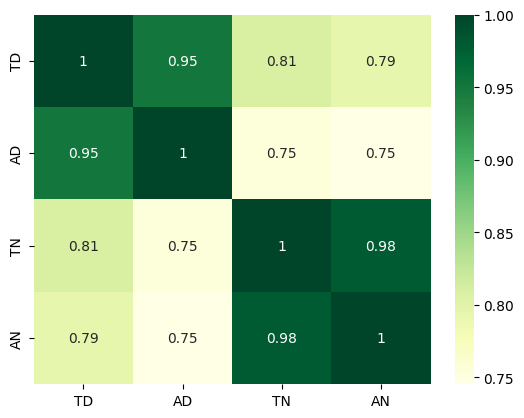

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlGn')

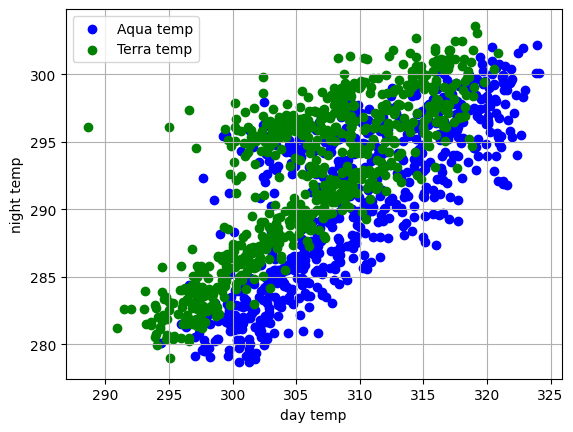

In [ ]:
mp.scatter(df['AD'],df['AN'],color='blue',label="Aqua temp")
mp.scatter(df['TD'],df['TN'],color='green',label="Terra temp")
mp.grid()
mp.xlabel("day temp")
mp.ylabel("night temp")
mp.legend()
mp.show()

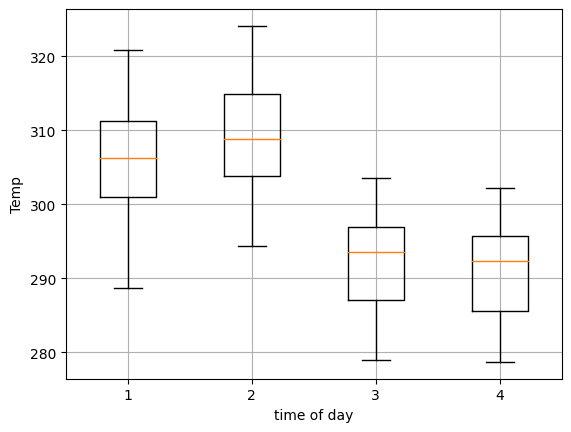

In [ ]:
mp.boxplot(df)
mp.xlabel("time of day")
mp.ylabel("Temp")
mp.grid()
mp.show()

#Training on Regressor Model

In [ ]:
from sklearn import linear_model
regressor=linear_model.LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## metrices

predicting on test set

In [ ]:
y_pred=regressor.predict(x_test)

predicting on train set

In [ ]:
y_tpred=regressor.predict(x_train)

In [ ]:
regressor.coef_

array([-0.04647595,  0.05098253,  0.983629  ])

In [ ]:
regressor.intercept_

1.814105104674809

test r2 score

In [ ]:
r2=sklearn.metrics.r2_score(y_test,y_pred)
print("r2 score is : ",r2)

r2 score is :  0.9253795279548767


train r2 score

In [ ]:
r2t=sklearn.metrics.r2_score(y_train,y_tpred)
print("r2 score is : ",r2t)

r2 score is :  0.9599225162822708


test rmse score

In [ ]:
rmse=sklearn.metrics.mean_squared_error(y_test, y_pred)
print("rmse for multiple lin reg is : ",rmse)

rmse for multiple lin reg is :  2.1970071735338896


train rmse score

In [ ]:
rmset=sklearn.metrics.mean_squared_error(y_train, y_tpred)
print("rmse for multiple lin reg is : ",rmset)

rmse for multiple lin reg is :  1.4280956959714235


##plots

!!!!!!!!!!problem here... how to actually plot whole data with apt scaling??


for convinience i ve plotted 100 head of data

In [ ]:
time=np.linspace(0,100,len(y_train[1:100]))

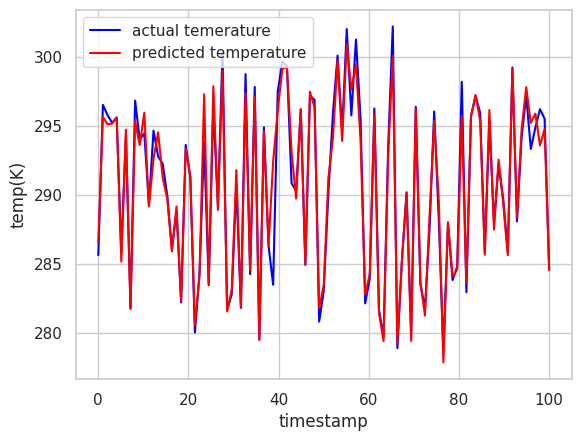

In [ ]:
mp.plot(time,y_train[1:100],label="actual temerature",color="blue")
mp.plot(time,y_tpred[1:100],label="predicted temperature",color="red")
mp.xlabel("timestamp")
mp.ylabel("temp(K)")
mp.legend()
mp.show()

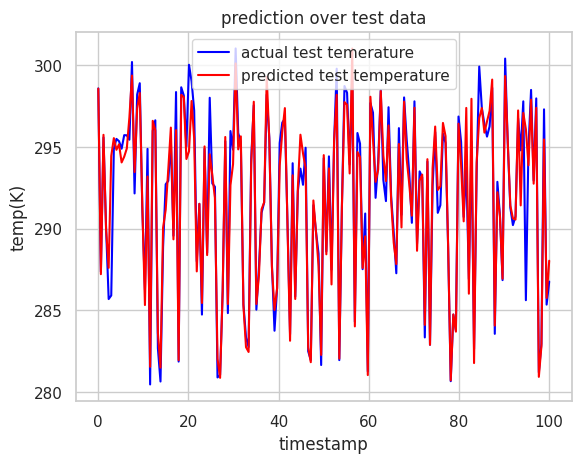

In [ ]:
ttime=np.linspace(0,100,len(y_test))
mp.plot(ttime,y_test,label="actual test temerature",color="blue")
mp.plot(ttime,y_pred,label="predicted test temperature",color="red")
mp.xlabel("timestamp")
mp.ylabel("temp(K)")
mp.title("prediction over test data")
mp.legend()

mp.show()

corelation bw actual AN and predicted AN data

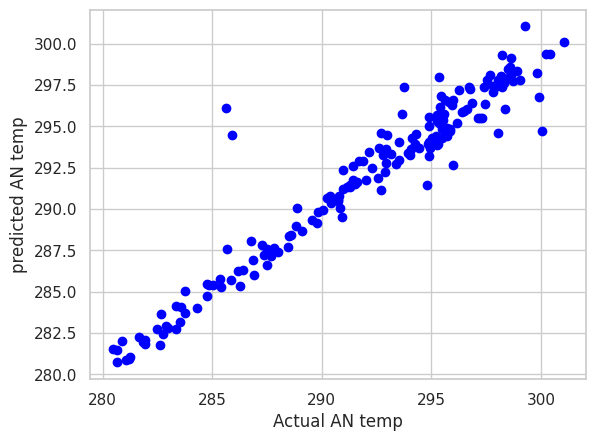

In [ ]:
mp.scatter(y_test,y_pred,color="blue")
mp.xlabel("Actual AN temp")
mp.ylabel("predicted AN temp")
mp.show()